In [1]:
#5.2 분산 분석
#5.2.8 분석 준비

# 수치계산
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats

#그래픽
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 통계모델 추정에 사용하는 라이브러리리
import statsmodels.formula.api as smf
import statsmodels.api as sm

%precision 10
%matplotlib inline

In [2]:
#5.2.9 데이터 작성과 표시

#샘플 데이터
weather = [
    "cloudy","cloudy",
    "rainy","rainy",
    "sunny","sunny"
]

beer = [6,8,2,4,10,12]

weather_beer = pd.DataFrame({ # 딕션어리같은 포맷으로 행렬 데이타를 만듬
    "beer":beer,
    "weather": weather
})

print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
F:\Anaconda3_envs\tensor2\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='weather', ylabel='beer'>

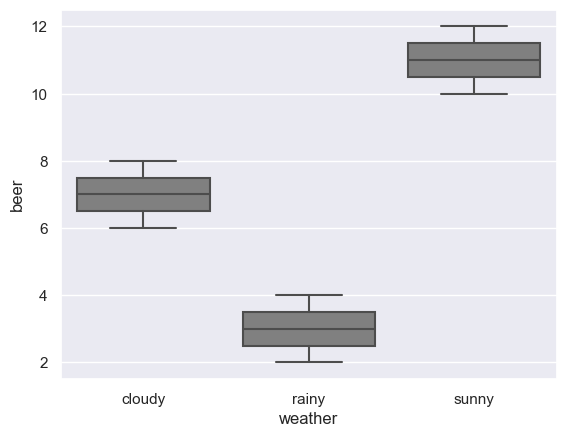

In [3]:
sns.boxplot(x = "weather",y = "beer", data = weather_beer, color = 'gray')

In [4]:
print(weather_beer.groupby("weather").mean())

         beer
weather      
cloudy    7.0
rainy     3.0
sunny    11.0


In [5]:
effect = [7,7,3,3,11,11]
mu_effect = np.mean(effect)
squares_model = np.sum((effect-mu_effect)**2) #브로드캐스팅으로 모든 리스트값에서 뺌
print(effect-mu_effect)
print(squares_model)

[ 0.  0. -4. -4.  4.  4.]
64.0


In [6]:
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [7]:
squares_resid = np.sum(resid**2) # 6개의 군내 차의 제곱
squares_resid

6

In [8]:
#5.2.11 분산분석(2): 군간분석과 군내분산 계산

df_model = 2
df_resid = 3

variance_model = squares_model / df_model # 3구간의 분산이므로 자유도가 2
variance_model

32.0000000000

In [9]:
variance_resid = squares_resid/df_resid # 샘플사이즈6 수준이 3가지 6-3
variance_resid

2.0000000000

In [10]:
#5.2.12 분산분석(3):p값 계산
f_ratio = variance_model/variance_resid #군간분산/ 군내분산
f_ratio

16.0000000000

In [11]:
1 - sp.stats.f.cdf(x = f_ratio, dfn = df_model, dfd = df_resid)

0.0250945733

In [12]:
#5.2.13 독립변수가 카테고리형인 일반선형모델
#5.2.14 더미변수

In [13]:
anova_model = smf.ols("beer ~weather", data = weather_beer).fit()

In [14]:
print(sm.stats.anova_lm(anova_model, typ=2))

          sum_sq   df     F    PR(>F)
weather     64.0  2.0  16.0  0.025095
Residual     6.0  3.0   NaN       NaN


In [15]:
#5.2.17 모델의 계수 해석
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [16]:
#5.2.18 모델읠 사용해서 오차와 효과 분리하기
fitted = anova_model.fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [17]:
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [18]:
# 5.2.19 회귀모델의 분산분석
beer = pd.read_csv("data/5-1-1-beer.csv")
#모델추정
lm_model = smf.ols(formula = "beer ~ temperature",data = beer).fit()

In [19]:
beer.head()

,beer,temperature
0,45.3,20.5
1,59.3,25.0
2,40.4,10.0
3,38.0,26.9
4,37.0,15.8


In [20]:
df_lm_model = 1 # 모델의 자유도  독립변수 기울기, 절편 2-1
df_lm_resid = 28 # 잔차의 자유도 샘플사이즈 30 에서 추정패러미터수 2


In [21]:
#모델을 적용한 값
lm_effect = lm_model.lm_effect = lm_model.fittedvalues
#잔차
lm_resid = lm_model.resid

#기온의 효과의 크기
mu = np.mean(lm_effect)
squares_lm_model = np.sum((lm_effect - mu)**2)
variance_lm_model = squares_lm_model/ df_lm_model

#잔차의 크기
squares_lm_resid = np.sum((lm_resid)**2)
variance_lm_resid = squares_lm_resid / df_lm_resid

#F비
f_value_lm = variance_lm_model/variance_lm_resid
f_value_lm

28.4469836885

In [22]:
print(sm.stats.anova_lm(lm_model, typ=2))

                  sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN


In [24]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Fri, 08 Sep 2023   Prob (F-statistic):           1.11e-05
Time:                        06:05:49   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""